In [169]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import confusion_matrix
from skopt.space import Categorical, Real
from sklearn.metrics import roc_curve, roc_auc_score

In [2]:
df = pd.read_csv('penguins_size.csv')
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [3]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [4]:
df.shape

(344, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [6]:
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [7]:
df[df.isnull().any(axis=1)]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


# **Handling Missing Values**

In [8]:
df.drop([3,339], inplace=True)
df.shape

(342, 7)

In [9]:
df.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  8
dtype: int64

In [10]:
Species = df['species'].value_counts()
Species

species
Adelie       151
Gentoo       123
Chinstrap     68
Name: count, dtype: int64

In [11]:
df['sex']=df['sex'].fillna(df['sex'].mode()[0])
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [12]:
df['sex'] = df['sex'].replace({".": "FEMALE"})
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [13]:
ColPal = sns.crayon_palette(['Red', 'Yellow', 'Blue'])

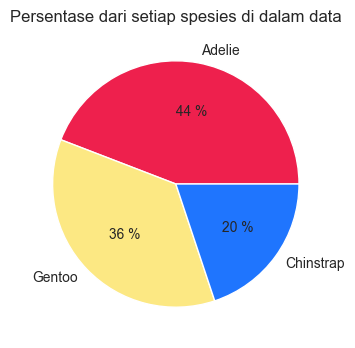

In [14]:
fig, ax = plt.subplots(figsize=(4,4))
plt.pie(Species, colors=ColPal, autopct = '% 1.f %%', labels=['Adelie','Gentoo','Chinstrap'])
plt.title("Persentase dari setiap spesies di dalam data")
plt.show()

[Text(0, 0, '176'), Text(0, 0, '166')]

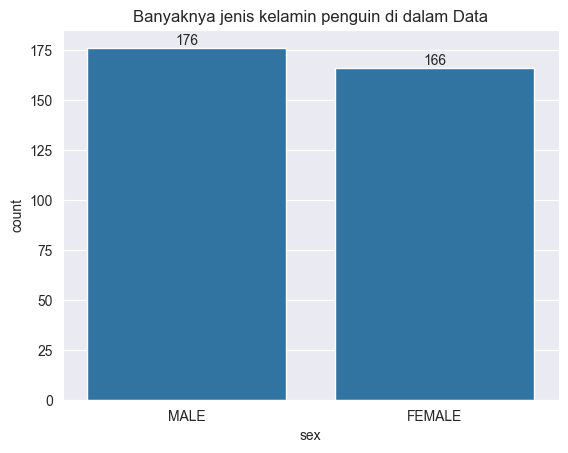

In [15]:
ax = sns.countplot(x=df['sex'])
ax.set_title("Banyaknya jenis kelamin penguin di dalam Data")
ax.bar_label(container=ax.containers[0], labels=df['sex'].value_counts())

Text(0.5, 1.0, 'Jenis Kelamin penguin berdasarkan spesies')

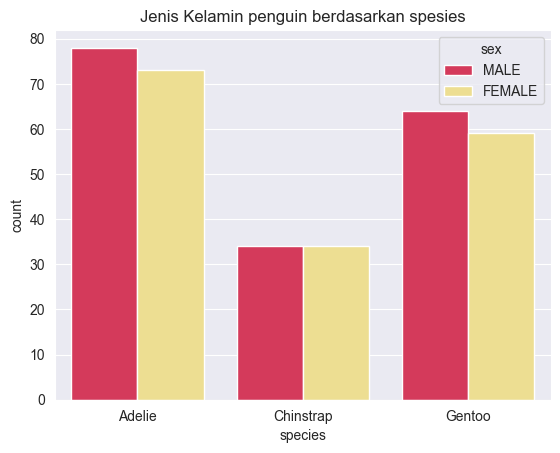

In [16]:
sns.countplot(hue=df['sex'], x=df['species'], palette = ColPal)
plt.title('Jenis Kelamin penguin berdasarkan spesies')

In [17]:
df['sex'].groupby(df['species']).value_counts()

species    sex   
Adelie     MALE      78
           FEMALE    73
Chinstrap  FEMALE    34
           MALE      34
Gentoo     MALE      64
           FEMALE    59
Name: count, dtype: int64

Text(0.5, 1.0, 'Tempat tinggal Penguin berdasarkan spesies')

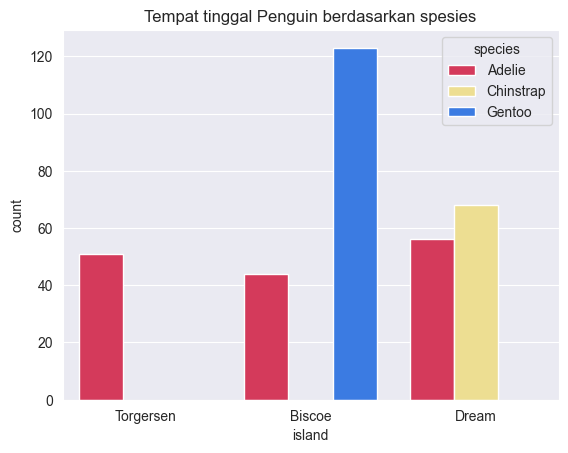

In [18]:
sns.countplot(x = df['island'], hue = df['species'], palette = ColPal)
plt.title('Tempat tinggal Penguin berdasarkan spesies')

Text(0.5, 1.0, 'Perbedaan Panjang Cullmen di spesies berdasarkan jenis kelamin')

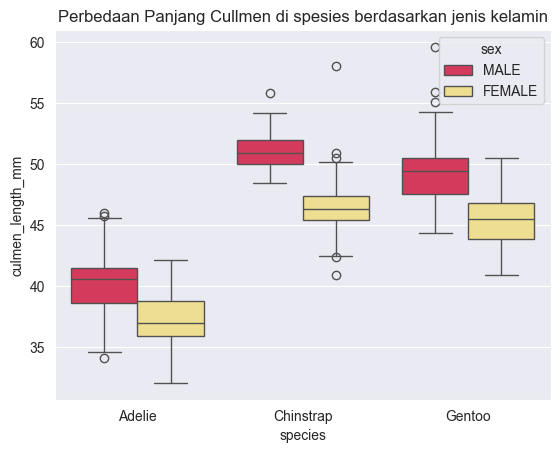

In [19]:
sns.boxplot(data=df, x='species', y='culmen_length_mm', hue='sex', palette = ColPal)
plt.title('Perbedaan Panjang Cullmen di spesies berdasarkan jenis kelamin')

In [20]:
df.groupby(['species','sex'])['culmen_length_mm'].describe()

count       mean       std   min     25%    50%     75%  \
species   sex                                                               
Adelie    FEMALE   73.0  37.257534  2.028883  32.1  35.900  37.00  38.800   
          MALE     78.0  40.226923  2.377365  34.1  38.650  40.60  41.500   
Chinstrap FEMALE   34.0  46.573529  3.108669  40.9  45.425  46.30  47.375   
          MALE     34.0  51.094118  1.564558  48.5  50.050  50.95  51.975   
Gentoo    FEMALE   59.0  45.545763  2.038197  40.9  43.900  45.50  46.850   
          MALE     64.0  49.310938  2.767677  44.4  47.525  49.45  50.500   

                   max  
species   sex           
Adelie    FEMALE  42.2  
          MALE    46.0  
Chinstrap FEMALE  58.0  
          MALE    55.8  
Gentoo    FEMALE  50.5  
          MALE    59.6

Text(0.5, 1.0, 'Perbandingan kedalaman culmen berdasarkan spesies dan jenis kelamin')

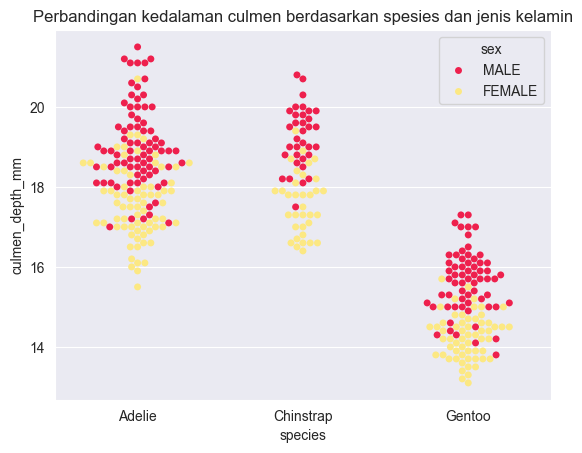

In [21]:
sns.swarmplot(data = df, x = 'species', y = 'culmen_depth_mm', hue = 'sex', palette = ColPal)
plt.title("Perbandingan kedalaman culmen berdasarkan spesies dan jenis kelamin")

In [22]:
df.groupby(['species','sex'])['culmen_depth_mm'].mean()

species    sex   
Adelie     FEMALE    17.621918
           MALE      19.024359
Chinstrap  FEMALE    17.588235
           MALE      19.252941
Gentoo     FEMALE    14.262712
           MALE      15.645313
Name: culmen_depth_mm, dtype: float64

Text(0.5, 1.0, 'Membandingkan panjang sirip berdasarkan spesies dan pulau')

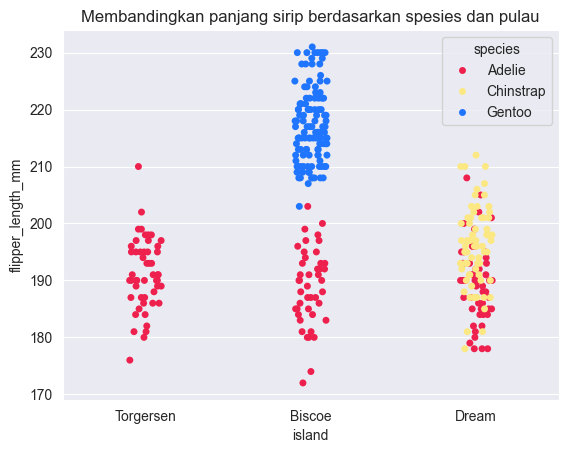

In [23]:
sns.stripplot(data = df, y = 'flipper_length_mm', x = 'island', hue = 'species', palette = ColPal)
plt.title("Membandingkan panjang sirip berdasarkan spesies dan pulau")  

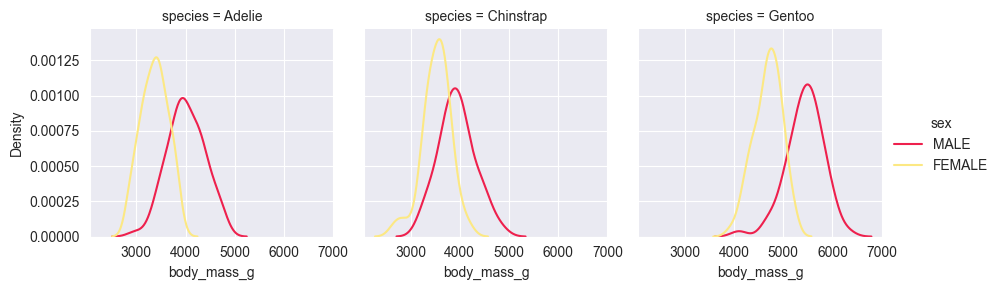

In [24]:
g = sns.FacetGrid(df, col="species", hue="sex", palette = ColPal)
g.map_dataframe(sns.kdeplot, x="body_mass_g")
g.add_legend()

In [25]:
df.groupby(['species','sex'])["body_mass_g"].std()

species    sex   
Adelie     FEMALE    269.380102
           MALE      373.767399
Chinstrap  FEMALE    285.333912
           MALE      362.137550
Gentoo     FEMALE    280.295437
           MALE      376.648987
Name: body_mass_g, dtype: float64

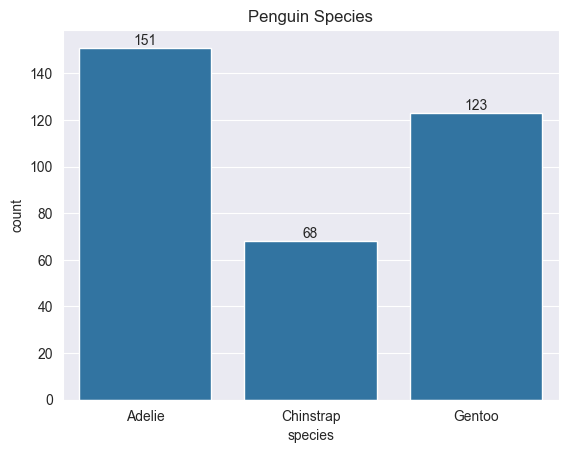

In [26]:
ax = sns.countplot(data=df, x="species")
ax.bar_label(ax.containers[0])
ax.set(title="Penguin Species")
plt.show()

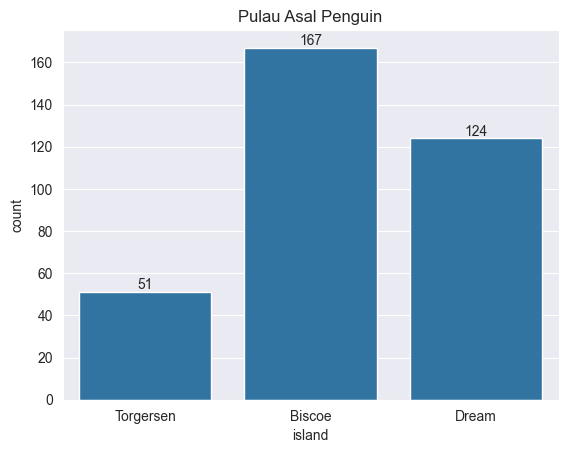

In [27]:
ax = sns.countplot(data=df, x="island")
ax.bar_label(ax.containers[0])
ax.set(title="Pulau Asal Penguin")
plt.show()

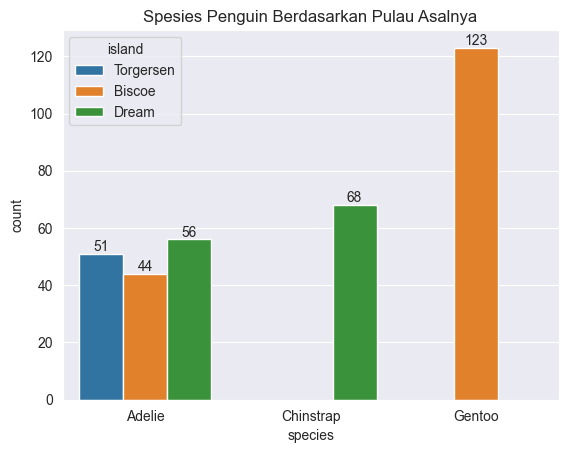

In [28]:
ax = sns.countplot(data=df, x="species", hue="island")
ax.set(title="Spesies Penguin Berdasarkan Pulau Asalnya")
for container in ax.containers:
    ax.bar_label(container)
plt.show()

In [29]:
new_df = df.copy()
new_df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [30]:
new_df = new_df.drop(['species', 'island'],axis=1)
new_df

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
4,36.7,19.3,193.0,3450.0,FEMALE
5,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,FEMALE
340,46.8,14.3,215.0,4850.0,FEMALE
341,50.4,15.7,222.0,5750.0,MALE
342,45.2,14.8,212.0,5200.0,FEMALE


# **Supervised Learning**

## **Cross-Validation**

In [31]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.metrics import classification_report, accuracy_score
from skopt import BayesSearchCV

In [32]:
k_fold = KFold(n_splits=10,shuffle=True)

In [33]:
train = new_df.drop('sex', axis = 1)
target = new_df['sex']
train.shape, target.shape

((342, 4), (342,))

## **Random Forest Classifier**

In [34]:
param_grid = {
    'n_estimators': (25, 50),
    'max_features': ('sqrt', 'log2'),
    'max_depth': (3, 6),
    'max_leaf_nodes': (3, 6),
}


In [35]:
bayes_search = BayesSearchCV(RandomForestClassifier(),
                           search_spaces=param_grid)
bayes_search.fit(train, target)
print(bayes_search.best_params_)

OrderedDict([('max_depth', 5), ('max_features', 'log2'), ('max_leaf_nodes', 4), ('n_estimators', 40)])


In [176]:
rf_model = RandomForestClassifier(max_depth=6, max_features='log2',max_leaf_nodes=6, n_estimators=25)

In [177]:
rf_predict = cross_val_predict(rf_model, train, target, cv=k_fold, n_jobs=5)

Confusion Matrix:
 [[144  22]
 [ 25 151]]


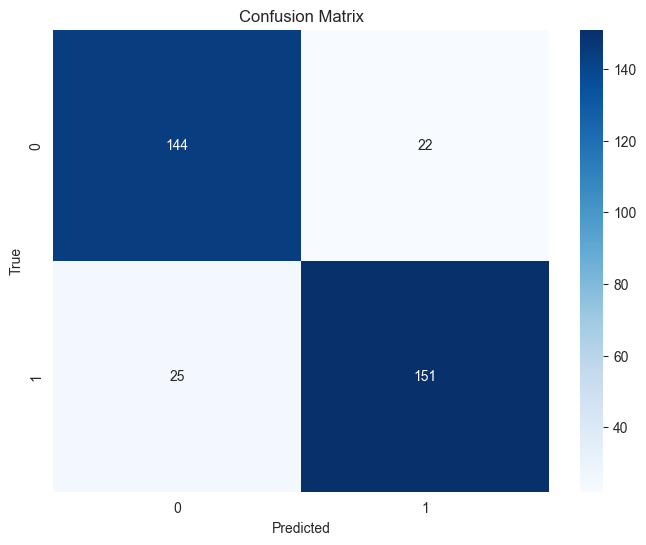

In [178]:
cm = confusion_matrix(target, rf_predict)
print("Confusion Matrix:\n", cm)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [179]:
print(classification_report(target,rf_predict))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86       166
           1       0.87      0.86      0.87       176

    accuracy                           0.86       342
   macro avg       0.86      0.86      0.86       342
weighted avg       0.86      0.86      0.86       342


In [180]:
accuracy = accuracy_score(target, rf_predict)
print("Accuracy:", accuracy)

Accuracy: 0.8625730994152047


In [181]:
rf_model.fit(train, target)

# Make predictions using cross-validation
rf_predict_proba = cross_val_predict(rf_model, train, target, cv=k_fold, method='predict_proba')


In [182]:
fpr, tpr, thresholds = roc_curve(target, rf_predict_proba[:, 1])
roc_auc = roc_auc_score(target, rf_predict_proba[:, 1])

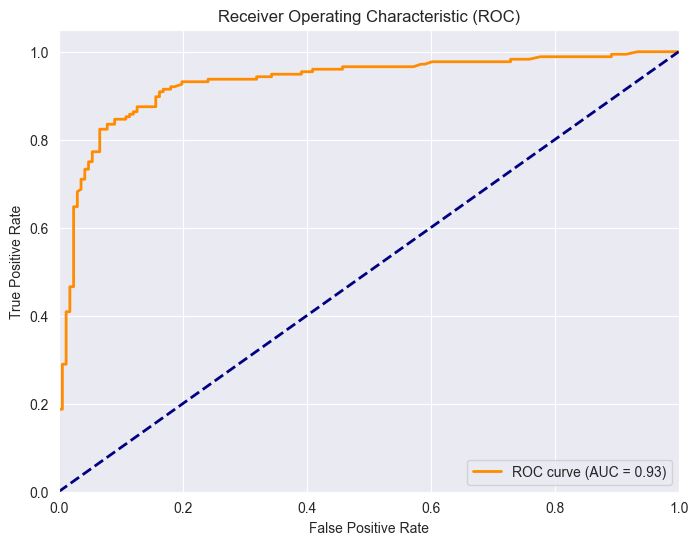

In [183]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

## **Support Vector Classifier**

In [41]:
param_grid = {
    'C': Real(1e-6, 12+66),
    'gamma': Real(1e-6, 1e+6),
    'kernel': Categorical(['rbf'])
}


In [42]:
svc_model = SVC()
bayes_search = BayesSearchCV(estimator=svc_model,
                           search_spaces=param_grid,
                           cv=k_fold,
                           n_jobs=5,
                           scoring='accuracy')
bayes_search.fit(train, target)

BayesSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=True),
              estimator=SVC(), n_jobs=5, scoring='accuracy',
              search_spaces={'C': Real(low=1e-06, high=78, prior='uniform', transform='normalize'),
                             'gamma': Real(low=1e-06, high=1000000.0, prior='uniform', transform='normalize'),
                             'kernel': Categorical(categories=('rbf',), prior=None)})

In [43]:
print("Hyperparameter terbaik:", bayes_search.best_params_)
print("Akurasi terbaik:", bayes_search.best_score_)

Hyperparameter terbaik: OrderedDict([('C', 64.37186783730269), ('gamma', 438949.1918955529), ('kernel', 'rbf')])
Akurasi terbaik: 0.5154621848739496


In [44]:
svc_model = SVC(C = 60, gamma=1e-06, kernel='rbf')

In [45]:
svc_predict = cross_val_predict(svc_model, train, target, cv=k_fold, n_jobs=5)

Confusion Matrix:
 [[135  31]
 [ 46 130]]


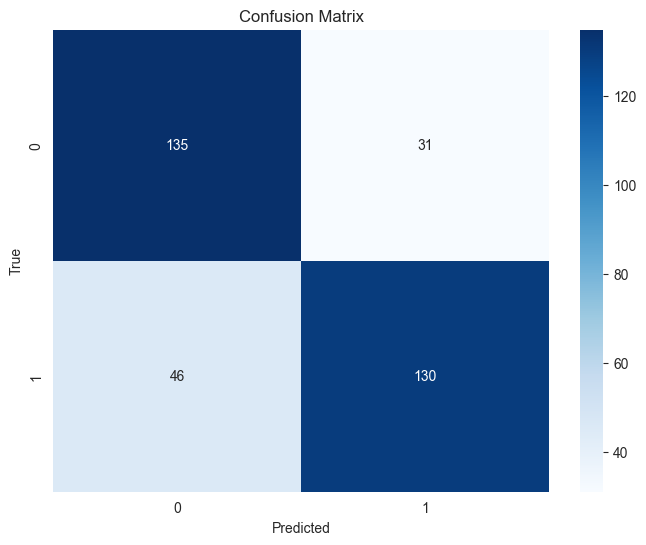

In [46]:
cm = confusion_matrix(target, svc_predict)
print("Confusion Matrix:\n", cm)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [47]:
print(classification_report(target, svc_predict))

              precision    recall  f1-score   support

      FEMALE       0.75      0.81      0.78       166
        MALE       0.81      0.74      0.77       176

    accuracy                           0.77       342
   macro avg       0.78      0.78      0.77       342
weighted avg       0.78      0.77      0.77       342


In [48]:
accuracy = accuracy_score(target, svc_predict)
print("Accuracy:", accuracy)

Accuracy: 0.7748538011695907


In [170]:
svc_model.fit(train, target)

# Make predictions using cross-validation
svc_predict_proba = cross_val_predict(svc_model, train, target, cv=k_fold, method='decision_function')

In [171]:
fpr, tpr, thresholds = roc_curve(target, svc_predict_proba)
roc_auc = roc_auc_score(target, svc_predict_proba)


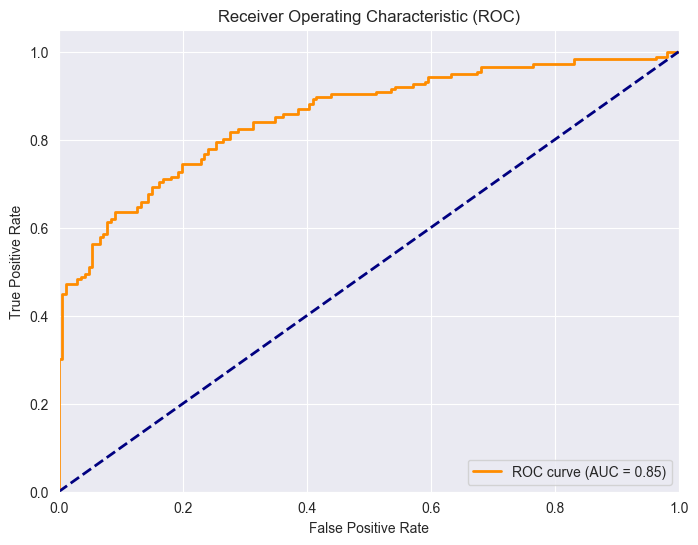

In [172]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# **Naive Bayes**

In [165]:
from sklearn.naive_bayes import GaussianNB  
from skopt import BayesSearchCV
from sklearn.metrics import roc_curve, roc_auc_score

In [50]:
model = GaussianNB()
param_grid ={'var_smoothing': np.logspace(0,-9, num=100)}
grid_search = BayesSearchCV(estimator=model, cv=5, n_jobs=-1, search_spaces=param_grid)
grid_search.fit(train, target)

BayesSearchCV(cv=5, estimator=GaussianNB(), n_jobs=-1,
              search_spaces={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.848...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])})

In [51]:
print("Hyperparameter terbaik:", grid_search.best_params_)
print("Akurasi terbaik:", grid_search.best_score_)

Hyperparameter terbaik: OrderedDict([('var_smoothing', 6.579332246575682e-09)])
Akurasi terbaik: 0.6640664961636829


In [52]:
NB_model = GaussianNB(var_smoothing=6.579332246575682e-09)

In [53]:
NB_predict = cross_val_predict(NB_model, train, target, cv=k_fold, n_jobs=5)

Confusion Matrix:
 [[121  45]
 [ 55 121]]


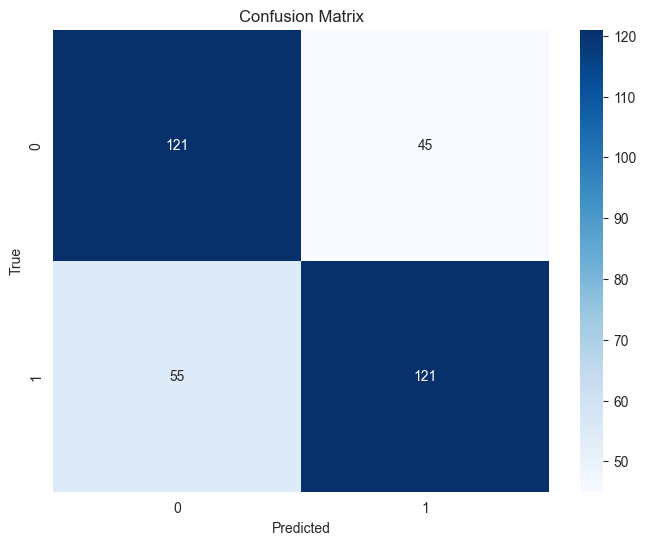

In [54]:
cm = confusion_matrix(target, NB_predict)
print("Confusion Matrix:\n", cm)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [55]:
print(classification_report(target, NB_predict))

              precision    recall  f1-score   support

      FEMALE       0.69      0.73      0.71       166
        MALE       0.73      0.69      0.71       176

    accuracy                           0.71       342
   macro avg       0.71      0.71      0.71       342
weighted avg       0.71      0.71      0.71       342


In [56]:
accuracy = accuracy_score(target, NB_predict)
print("Accuracy:", accuracy)

Accuracy: 0.7076023391812866


In [166]:
NB_model.fit(train, target)

# Make predictions using cross-validation
NB_predict_proba = cross_val_predict(NB_model, train, target, cv=k_fold, method='predict_proba')

In [167]:
fpr, tpr, thresholds = roc_curve(target, NB_predict_proba[:, 1])
roc_auc = roc_auc_score(target, NB_predict_proba[:, 1])

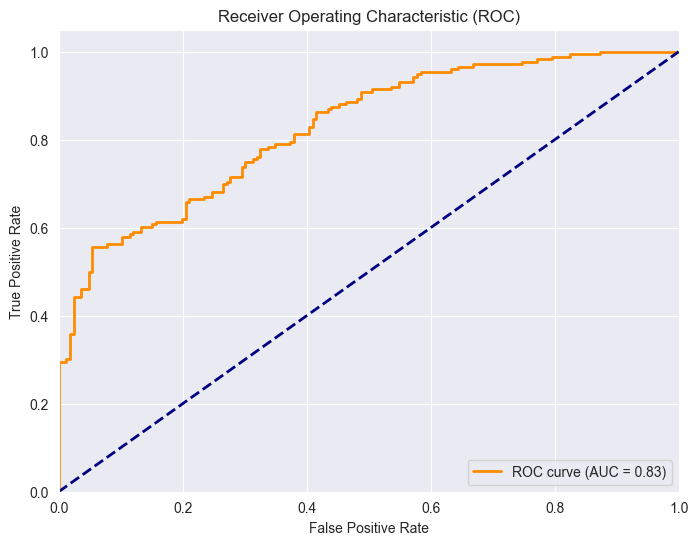

In [168]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# **Artificial Neural Network**

In [127]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [149]:
ANN_model = Sequential([
    Dense(8, activation='relu', input_shape=(train.shape[1],)),
    Dense(4, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [150]:
ANN_model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [151]:
history = ANN_model.fit(train, target, epochs=200, batch_size=32, verbose=2)

Epoch 1/200
11/11 - 3s - 245ms/step - accuracy: 0.5029 - loss: 10.5205
Epoch 2/200
11/11 - 0s - 5ms/step - accuracy: 0.5877 - loss: 3.1247
Epoch 3/200
11/11 - 0s - 8ms/step - accuracy: 0.6374 - loss: 2.0512
Epoch 4/200
11/11 - 0s - 15ms/step - accuracy: 0.6579 - loss: 1.7279
Epoch 5/200
11/11 - 0s - 8ms/step - accuracy: 0.6637 - loss: 1.5806
Epoch 6/200
11/11 - 0s - 7ms/step - accuracy: 0.6696 - loss: 1.5512
Epoch 7/200
11/11 - 0s - 8ms/step - accuracy: 0.6374 - loss: 1.7174
Epoch 8/200
11/11 - 0s - 9ms/step - accuracy: 0.6433 - loss: 1.8978
Epoch 9/200
11/11 - 0s - 14ms/step - accuracy: 0.6637 - loss: 1.6616
Epoch 10/200
11/11 - 0s - 7ms/step - accuracy: 0.6433 - loss: 1.5766
Epoch 11/200
11/11 - 0s - 5ms/step - accuracy: 0.6754 - loss: 1.5024
Epoch 12/200
11/11 - 0s - 6ms/step - accuracy: 0.6433 - loss: 1.6771
Epoch 13/200
11/11 - 0s - 5ms/step - accuracy: 0.6520 - loss: 1.7334
Epoch 14/200
11/11 - 0s - 5ms/step - accuracy: 0.6608 - loss: 1.4646
Epoch 15/200
11/11 - 0s - 5ms/step - a

In [153]:
predictions = (ANN_model.predict(train) > 0.5).astype(int)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


In [154]:
cm = confusion_matrix(target, predictions)

print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[129  37]
 [ 29 147]]


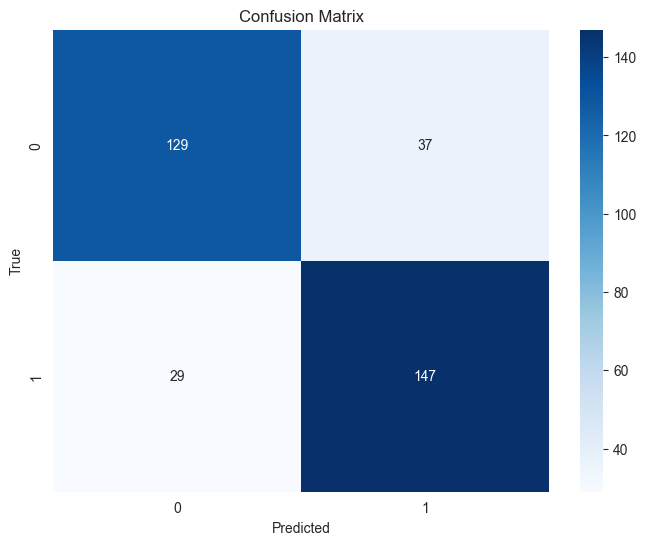

In [155]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [156]:
print(classification_report(target, predictions))

              precision    recall  f1-score   support

           0       0.82      0.78      0.80       166
           1       0.80      0.84      0.82       176

    accuracy                           0.81       342
   macro avg       0.81      0.81      0.81       342
weighted avg       0.81      0.81      0.81       342


In [157]:
accuracy = accuracy_score(true_labels, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.8070175438596491


In [158]:
from sklearn.metrics import roc_auc_score, roc_curve

In [160]:
y_pred_proba = ANN_model.predict(train)

# Hitung nilai AUC
auc = roc_auc_score(target, y_pred_proba)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [161]:
fpr, tpr, thresholds = roc_curve(target, y_pred_proba)

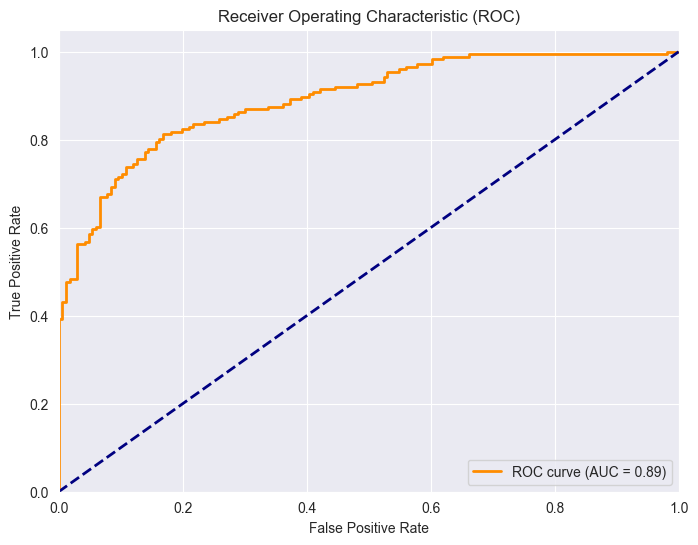

In [164]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()